<a href="https://colab.research.google.com/github/SamLutz/2024_MLEES/blob/main/final_project_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final Project MLEES SA24


In [ ]:
!pip install netCDF4
!pip install xarray
import os
import numpy as np
import xarray as xr
from netCDF4 import Dataset
from datetime import datetime
import pooch
import netCDF4 as nc
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.9 MB/s eta 0:00:00


1. Download data from Onedrive with Pooch & give names to files


In [ ]:
# List of OneDrive files with their URLs
files_urls = [
    'https://unils-my.sharepoint.com/:u:/g/personal/samuel_lutz_unil_ch/Efe70_k3wXJHnrbYK9h1uBwBUgNCzc5_24r73e1xETG0ug?download=1',
    'https://unils-my.sharepoint.com/:u:/g/personal/samuel_lutz_unil_ch/EWAfM2fXmJBEiCTivTpZlCEBa5sKr-6SGX8M27JoblF3Tg?download=1',
    'https://unils-my.sharepoint.com/:u:/g/personal/samuel_lutz_unil_ch/ESbZRJJ1jSlCuRxFQTeXxmEBJ8yD8u42W8cjlNVbeh4CCw?download=1',
    'https://unils-my.sharepoint.com/:u:/g/personal/samuel_lutz_unil_ch/ERypBJ2Dpi1LgIYALQoJFhoBHpjHhC5Ygk85FmJ075y7uw?download=1',
]

# Hashed file values (optional, use None if unknown)
hashes = [None] * len(files_urls)  # None for all files if you don't know their fingerprints

In [ ]:
file_names = ["L1_combined.nc", "L2_v0_combined.nc", "L2_v1_combined.nc", "L2_v2_combined.nc"]
downloaded_files = []  # List for storing the paths of downloaded files

for url, name in zip(files_urls, file_names):
    file_path = pooch.retrieve(url, known_hash=None, fname=name)  # Save with the right name
    downloaded_files.append(file_path)

print("Fichiers téléchargés :", downloaded_files)

SHA256 hash of downloaded file: ed7070a75e387b8a58b6aaea243f0bb48c9c7722c65c694c11f62bad24c2ebc1
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
SHA256 hash of downloaded file: 11b06a7ded09e4b6bd492b4691364871c1457610f096eb654c41711dcf4ea001
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
SHA256 hash of downloaded file: 03b7d4402715cff1a26b748d0e4df5338ef28dd7e0a3c20ab758155d8bcc234a
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
SHA256 hash of downloaded file: 5e35b275b7b3879558b5e604760e8a904e01f2fe83ee3ee1f6d977aba6a47ac1
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


Fichiers téléchargés : ['/root/.cache/pooch/L1_combined.nc', '/root/.cache/pooch/L2_v0_combined.nc', '/root/.cache/pooch/L2_v1_combined.nc', '/root/.cache/pooch/L2_v2_combined.nc']


Create a liste with all variables in data & load dataset



In [ ]:
# List to store variables for all files
all_variables = []

for file_path in downloaded_files:
    with nc.Dataset(file_path) as dataset:
        print(f"Fichier : {file_path}")
        print("Variables disponibles :", dataset.variables.keys())
        all_variables.append(dataset.variables.keys())


Fichier : /root/.cache/pooch/L1_combined.nc
Variables disponibles : dict_keys(['Batt', 'Ptemp', 'AirTC', 'RH', 'Slrw', 'Slrm', 'WS', 'WindDir', 'Rain', 'BP', 'WindGust', 'time_qual', 'Batt_qual', 'Ptemp_qual', 'AirTC_qual', 'RH_qual', 'Slrw_qual', 'Slrm_qual', 'WS_qual', 'WindDir_qual', 'Rain_qual', 'BP_qual', 'WindGust_qual', 'time'])
Fichier : /root/.cache/pooch/L2_v0_combined.nc
Variables disponibles : dict_keys(['temp', 'surfacetemp', 'bottomtemp', 'mixed_layer_depth', 'thermocline_depth', 'schmidt_stability', 'heat_content', 'time', 'depth'])
Fichier : /root/.cache/pooch/L2_v1_combined.nc
Variables disponibles : dict_keys(['temp', 'interp_temp', 'surfacetemp', 'bottomtemp', 'mixed_layer_depth', 'thermocline_depth', 'schmidt_stability', 'heat_content', 'time', 'depth'])
Fichier : /root/.cache/pooch/L2_v2_combined.nc
Variables disponibles : dict_keys(['temp', 'surfacetemp', 'bottomtemp', 'mixed_layer_depth', 'thermocline_depth', 'schmidt_stability', 'heat_content', 'time', 'depth'])

In [ ]:
# Load all files as a dataset
datasets = [xr.open_dataset(file) for file in downloaded_files]

# Merge on a common dimension (e.g. ‘time’)
data = xr.concat(datasets, dim="time")

# Inspect the result
print(data)

# Save the merged result
data.to_netcdf("data_merged.nc")


<xarray.Dataset> Size: 562MB
Dimensions:            (time: 516443, depth: 53)
Coordinates:
  * time               (time) datetime64[ns] 4MB 2019-07-29T18:00:00 ... 2024...
  * depth              (depth) float64 424B 0.25 0.5 0.75 1.0 ... 87.0 90.0 93.0
Data variables: (12/31)
    Batt               (time) float64 4MB 12.24 12.24 12.24 ... nan nan nan
    Ptemp              (time) float64 4MB 30.39 29.73 29.1 28.74 ... nan nan nan
    AirTC              (time) float64 4MB 23.39 23.31 23.43 ... nan nan nan
    RH                 (time) float64 4MB 60.12 60.19 58.28 57.7 ... nan nan nan
    Slrw               (time) float64 4MB 61.07 62.85 113.0 95.0 ... nan nan nan
    Slrm               (time) float64 4MB 0.03664 0.03771 0.0678 ... nan nan nan
    ...                 ...
    bottomtemp         (time) float64 4MB nan nan nan nan ... 7.499 7.507 7.507
    mixed_layer_depth  (time) float64 4MB nan nan nan nan ... 19.0 15.0 15.0
    thermocline_depth  (time) float64 4MB nan nan nan nan ... 

In [ ]:
# Lists the files in the current directory
import os
print(os.listdir('.'))

['.config', 'data_merged.nc', 'sample_data']


In [ ]:
for file_path in downloaded_files:
    dataset = xr.open_dataset(file_path)
    print(f"File: {file_path}")
    print("Variables available:")
    print(dataset.variables)  # Lists all variables with metadata
    print("\n")
    dataset.close()  # Close the file when done

File: /root/.cache/pooch/L1_combined.nc
Variables available:
Frozen({'Batt': <xarray.Variable (time: 268466)> Size: 2MB
[268466 values with dtype=float64]
Attributes:
    units:      V
    long_name:  battery_level, 'Ptemp': <xarray.Variable (time: 268466)> Size: 2MB
[268466 values with dtype=float64]
Attributes:
    units:      degC
    long_name:  panel_temperature, 'AirTC': <xarray.Variable (time: 268466)> Size: 2MB
[268466 values with dtype=float64]
Attributes:
    units:      degC
    long_name:  air_temperature, 'RH': <xarray.Variable (time: 268466)> Size: 2MB
[268466 values with dtype=float64]
Attributes:
    units:      %
    long_name:  relative_humidity, 'Slrw': <xarray.Variable (time: 268466)> Size: 2MB
[268466 values with dtype=float64]
Attributes:
    units:      W m-2
    long_name:  solar_irradiance, 'Slrm': <xarray.Variable (time: 268466)> Size: 2MB
[268466 values with dtype=float64]
Attributes:
    units:      MJ m-2
    long_name:  total_solar_irradiance, 'WS': <xarra

In [ ]:
# Uploading downloaded files
L1 = xr.open_dataset(downloaded_files[0])
L2_v0 = xr.open_dataset(downloaded_files[1])
L2_v1 = xr.open_dataset(downloaded_files[2])
L2_v2 = xr.open_dataset(downloaded_files[3])

# Displays a preview of the data to check
print(L1)
print(L2_v0)
print(L2_v1)
print(L2_v2)

<xarray.Dataset> Size: 52MB
Dimensions:        (time: 268466)
Coordinates:
  * time           (time) datetime64[ns] 2MB 2019-07-29T18:00:00 ... 2024-10-...
Data variables: (12/23)
    Batt           (time) float64 2MB ...
    Ptemp          (time) float64 2MB ...
    AirTC          (time) float64 2MB ...
    RH             (time) float64 2MB ...
    Slrw           (time) float64 2MB ...
    Slrm           (time) float64 2MB ...
    ...             ...
    Slrm_qual      (time) float64 2MB ...
    WS_qual        (time) float64 2MB ...
    WindDir_qual   (time) float64 2MB ...
    Rain_qual      (time) float64 2MB ...
    BP_qual        (time) float64 2MB ...
    WindGust_qual  (time) float64 2MB ...
Attributes:
    institution:  EPFL
    source:       Lexplore Weather station Campbell CR1000
    references:   LéXPLORE commun instruments sebastien.lavanchy@epfl.ch
    history:      See history on Renku
    conventions:  CF 1.7
    comment:      Data from the Meteostation on Lexplore Plat

In [ ]:
# Choose specific variables in data
L1 = L1[['AirTC', 'WS', 'Slrw']]
L2_v0 = L2_v0[['surfacetemp']]
L2_v1 = L2_v1[['surfacetemp']]
L2_v2 = L2_v2[['surfacetemp']]

l1_timeindices = L1.time.values
l2_v0_timeindices = L2_v0.time.values
l2_v1_timeindices = L2_v1.time.values
l2_v2_timeindices = L2_v2.time.values

In [ ]:
# Take away double values for one timestep for L1
unique_vals, unique_idxs = np.unique(l1_timeindices, return_inverse=True)
unique_counts = np.bincount(unique_idxs)
count_mask = unique_counts > 1
dup_values = unique_vals[count_mask]
bool_mask = np.isin(L1.time, dup_values)

L1 = L1.isel(time=~bool_mask)

In [ ]:
# Take away double values for one timestep for L2_v0
unique_vals, unique_idxs = np.unique(l2_v0_timeindices, return_inverse=True)
unique_counts = np.bincount(unique_idxs)
count_mask = unique_counts > 1
dup_values = unique_vals[count_mask]
bool_mask = np.isin(L2_v0.time, dup_values)

L2_v0 = L2_v0.isel(time=~bool_mask)

In [ ]:
# Take away double values for one timestep for L2_v1
unique_vals, unique_idxs = np.unique(l2_v1_timeindices, return_inverse=True)
unique_counts = np.bincount(unique_idxs)
count_mask = unique_counts > 1
dup_values = unique_vals[count_mask]
bool_mask = np.isin(L2_v1.time, dup_values)

L2_v1 = L2_v1.isel(time=~bool_mask)

In [ ]:
# Take away double values for one timestep for L2_v2
unique_vals, unique_idxs = np.unique(l2_v2_timeindices, return_inverse=True)
unique_counts = np.bincount(unique_idxs)
count_mask = unique_counts > 1
dup_values = unique_vals[count_mask]
bool_mask = np.isin(L2_v2.time, dup_values)

L2_v2 = L2_v2.isel(time=~bool_mask)

In [ ]:
# Merge data into one dataset
merged_ds = xr.merge([L1, L2_v0, L2_v1, L2_v2])

In [ ]:
print(merged_ds)

<xarray.Dataset> Size: 11MB
Dimensions:      (time: 278810)
Coordinates:
  * time         (time) datetime64[ns] 2MB 2019-06-19T11:40:00 ... 2024-10-30...
Data variables:
    AirTC        (time) float64 2MB nan nan nan nan ... 13.7 13.57 13.48 13.49
    WS           (time) float64 2MB nan nan nan nan ... 1.088 1.1 0.928 0.534
    Slrw         (time) float64 2MB nan nan nan nan ... 125.1 103.3 81.1 59.21
    surfacetemp  (time) float64 2MB nan nan nan nan ... 14.94 14.94 14.94 14.94
Attributes:
    institution:  EPFL
    source:       Lexplore Weather station Campbell CR1000
    references:   LéXPLORE commun instruments sebastien.lavanchy@epfl.ch
    history:      See history on Renku
    conventions:  CF 1.7
    comment:      Data from the Meteostation on Lexplore Platform in Lake Geneva
    title:        Lexplore Meteostation


In [ ]:
# Convert the xarray.Dataset to a pandas DataFrame
df = merged_ds.to_dataframe()

# Display the first few rows of the table
print(df.head())  # Shows the first 5 rows

# Check the columns and data information
print(df.info())  # Summary of columns and data types

                     AirTC  WS  Slrw  surfacetemp
time                                             
2019-06-19 11:40:00    NaN NaN   NaN          NaN
2019-06-19 11:50:00    NaN NaN   NaN          NaN
2019-06-19 12:00:00    NaN NaN   NaN          NaN
2019-06-19 12:10:00    NaN NaN   NaN          NaN
2019-06-19 12:20:00    NaN NaN   NaN          NaN
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 278810 entries, 2019-06-19 11:40:00 to 2024-10-30 15:50:00
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   AirTC        268460 non-null  float64
 1   WS           268460 non-null  float64
 2   Slrw         268454 non-null  float64
 3   surfacetemp  238829 non-null  float64
dtypes: float64(4)
memory usage: 10.6 MB
None


*I have to scale my inputs by using standerd scaling for each coloumn*

**Random Forest Model**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Ensure the time column is in the index
df.reset_index(inplace=True)

# Add a "year" column for splitting based on time
df['year'] = df['time'].dt.year

# Drop rows with NaN values (or handle them as needed)
df = df.dropna(subset=['AirTC', 'WS', 'Slrw', 'surfacetemp'])

# Define features and target
features = ['AirTC', 'WS', 'Slrw']
target = 'surfacetemp'

In [ ]:
# Split data into training (2020-2022), validation (2023), and testing (2024)
train_data = df[(df['year'] >= 2020) & (df['year'] <= 2022)]
val_data = df[df['year'] == 2023]
test_data = df[df['year'] == 2024]

# Extract features (X) and target (y)
X_train, y_train = train_data[features], train_data[target]
X_val, y_val = val_data[features], val_data[target]
X_test, y_test = test_data[features], test_data[target]

# Train a Random Forest model
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predictions
y_train_pred = rf.predict(X_train)
y_val_pred = rf.predict(X_val)
y_test_pred = rf.predict(X_test)

# Calculation of metrics: RMSE and R² for each set
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Displaying results
print("Performance du modèle :")
print(f"Train  -> RMSE: {train_rmse:.3f}, R²: {train_r2:.3f}")
print(f"Validation -> RMSE: {val_rmse:.3f}, R²: {val_r2:.3f}")
print(f"Test   -> RMSE: {test_rmse:.3f}, R²: {test_r2:.3f}")

Performance du modèle :
Train  -> RMSE: 0.846, R²: 0.978
Validation -> RMSE: 2.409, R²: 0.843
Test   -> RMSE: 2.452, R²: 0.823


In [ ]:
# Graph: Comparison between actual and predicted values
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6, edgecolor='k', label='Predicted vs Actual')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', label='Perfect Prediction')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
# Graph: Importance of variables
def plot_feature_importances(model, feature_names):
    importances = model.feature_importances_
    sorted_indices = np.argsort(importances)[::-1]
    sorted_features = [feature_names[i] for i in sorted_indices]

    plt.figure(figsize=(8, 6))
    plt.barh(sorted_features, importances[sorted_indices], color='skyblue', edgecolor='k')
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.title("Random Forest Feature Importance")
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.show()

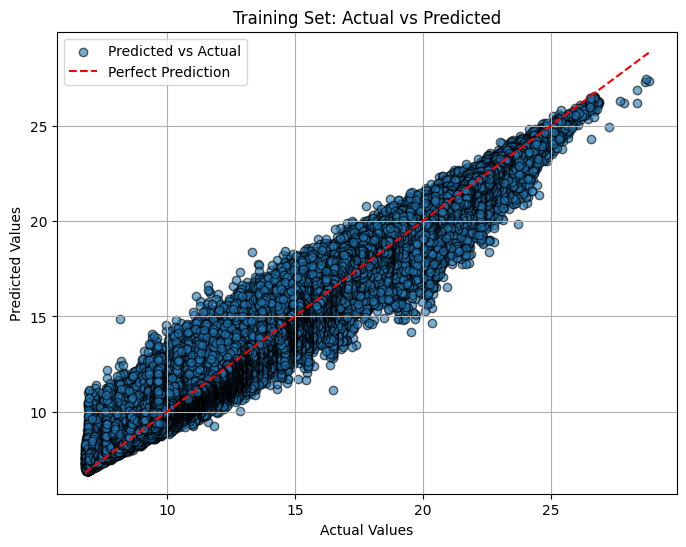

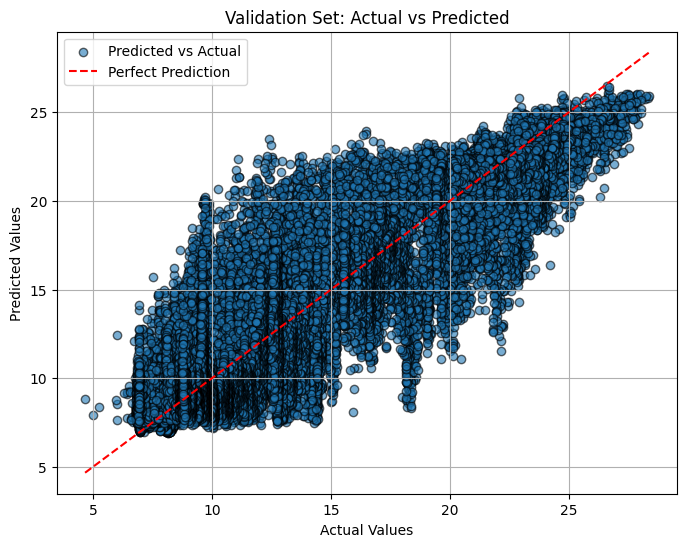

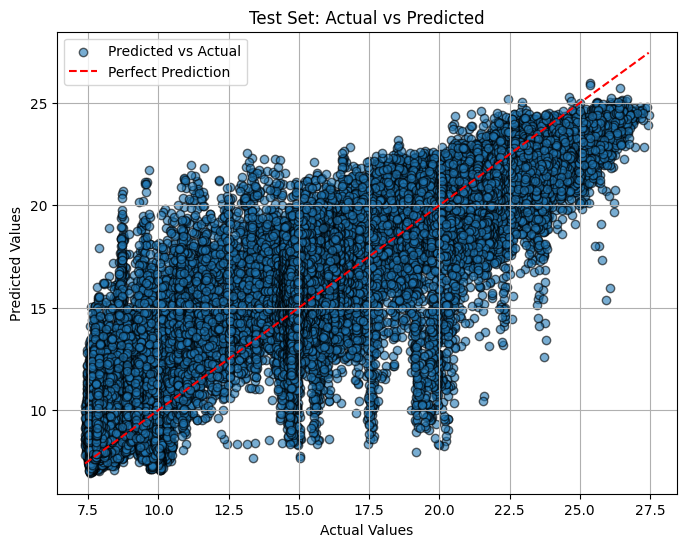

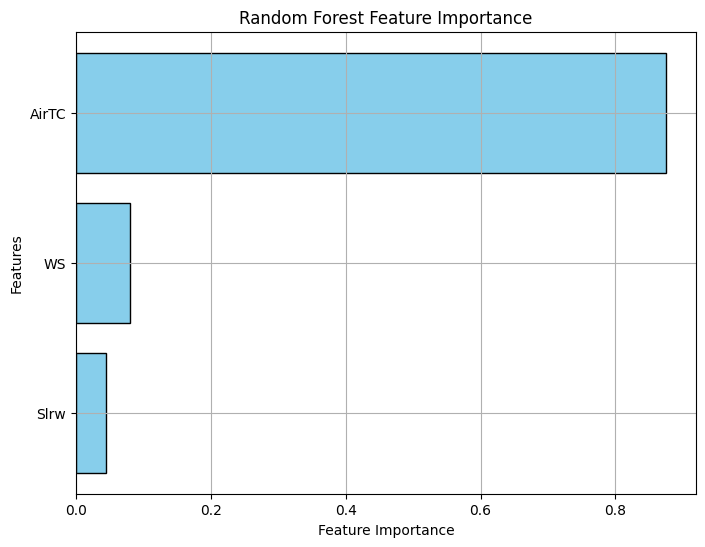

In [ ]:
# Visualising performance on the training set
plot_predictions(y_train, y_train_pred, "Training Set: Actual vs Predicted")

# Visualising performance on the validation set
plot_predictions(y_val, y_val_pred, "Validation Set: Actual vs Predicted")

# Viewing performance on the test set
plot_predictions(y_test, y_test_pred, "Test Set: Actual vs Predicted")

# Importance of variables
plot_feature_importances(rf, features)


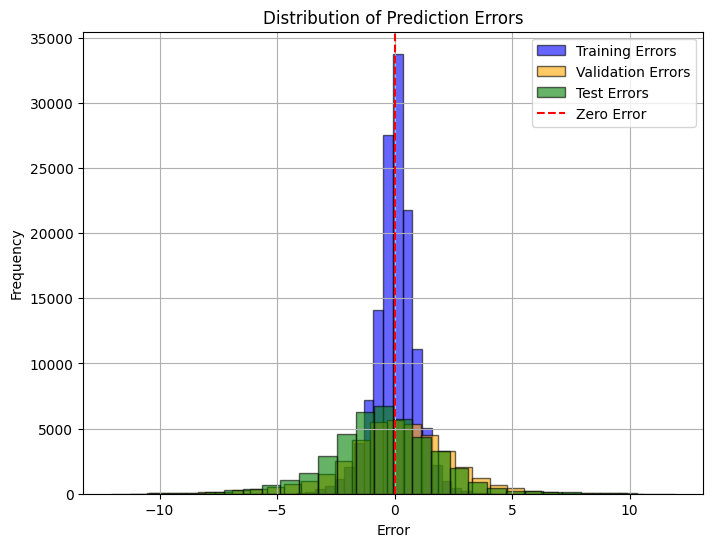

In [ ]:
# Calculating errors
train_errors = y_train - y_train_pred
val_errors = y_val - y_val_pred
test_errors = y_test - y_test_pred

# Error display
plt.figure(figsize=(8, 6))
plt.hist(train_errors, bins=30, alpha=0.6, label="Training Errors", color="blue", edgecolor='k')
plt.hist(val_errors, bins=30, alpha=0.6, label="Validation Errors", color="orange", edgecolor='k')
plt.hist(test_errors, bins=30, alpha=0.6, label="Test Errors", color="green", edgecolor='k')
plt.axvline(0, color='red', linestyle='--', label="Zero Error")
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(random_state=42, n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=3, scoring='neg_mean_squared_error')

# Convert scores to RMSE and display
rmse_scores = np.sqrt(-scores)
print(f"Cross-Validation RMSE: {rmse_scores}")
print(f"Average RMSE: {rmse_scores.mean():.3f}")


Cross-Validation RMSE: [2.91640254 2.50290582 2.80232087]
Average RMSE: 2.741


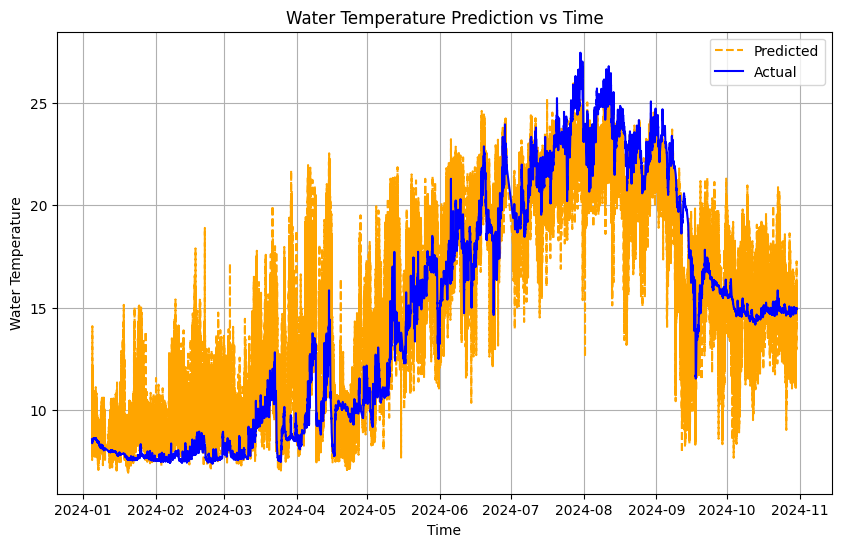

In [ ]:
# View predictions over time to see if they follow seasonal or daily trends.
plt.figure(figsize=(10, 6))
plt.plot(test_data['time'], y_test_pred, label='Predicted', color='orange', linestyle='--')
plt.plot(test_data['time'], y_test, label='Actual', color='blue')
plt.title("Water Temperature Prediction vs Time")
plt.xlabel("Time")
plt.ylabel("Water Temperature")
plt.legend()
plt.grid(True)
plt.show()

**xg boost model**

scaling apres sepratation et fit sur train and val



In [ ]:

# Step 3: Validate the model
y_val_pred = xgb_model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)  # Calculate RMSE for validation
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation RMSE: {val_rmse:.4f}")
print(f"Validation R²: {val_r2:.4f}")

# Step 4: Test the model
y_test_pred = xgb_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)  # Calculate RMSE for test
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R²: {test_r2:.4f}")

# Step 5: Train RMSE
y_train_pred = xgb_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)  # Calculate RMSE for training
print(f"Train RMSE: {train_rmse:.4f}")

# Step 6: Feature Importance Visualization
xgb_importance = xgb_model.feature_importances_

plt.figure(figsize=(8, 5))
plt.bar(X_train.columns, xgb_importance, color="skyblue")
plt.title("Feature Importance from XGBoost")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


Train RMSE: 2.1846
Train R²: 0.8529
Validation RMSE: 2.2077
Validation R²: 0.8685
Test RMSE: 2.2596
Test R²: 0.8495


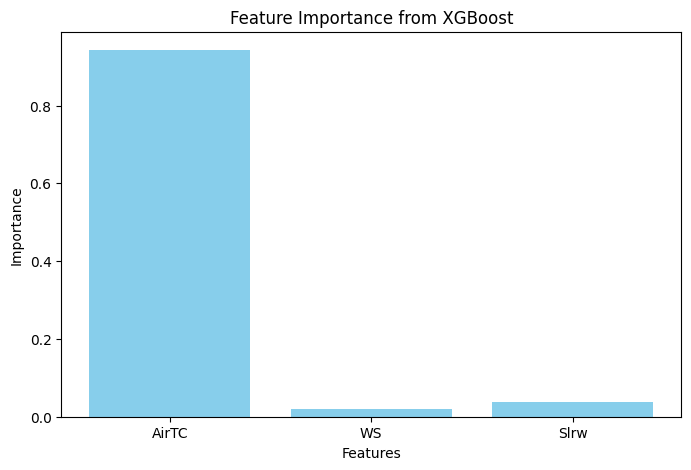

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Initialize the XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=100,   # Number of trees
    learning_rate=0.1,  # Step size shrinkage
    max_depth=6,        # Maximum tree depth
    subsample=0.8,      # Subsample ratio of the training instances
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    random_state=42     # For reproducibility
)

# Step 2: Train the model
xgb_model.fit(X_train, y_train)

y_train_pred = xgb_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)  # Calculate RMSE for training
train_r2 = r2_score(y_train, y_train_pred)
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R²: {train_r2:.4f}")


# Step 3: Validate the model
y_val_pred = xgb_model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)  # Calculate RMSE for validation
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation RMSE: {val_rmse:.4f}")
print(f"Validation R²: {val_r2:.4f}")

# Step 4: Test the model
y_test_pred = xgb_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)  # Calculate RMSE for test
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R²: {test_r2:.4f}")

# Step 5: Feature Importance Visualization
xgb_importance = xgb_model.feature_importances_

plt.figure(figsize=(8, 5))
plt.bar(X_train.columns, xgb_importance, color="skyblue")
plt.title("Feature Importance from XGBoost")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


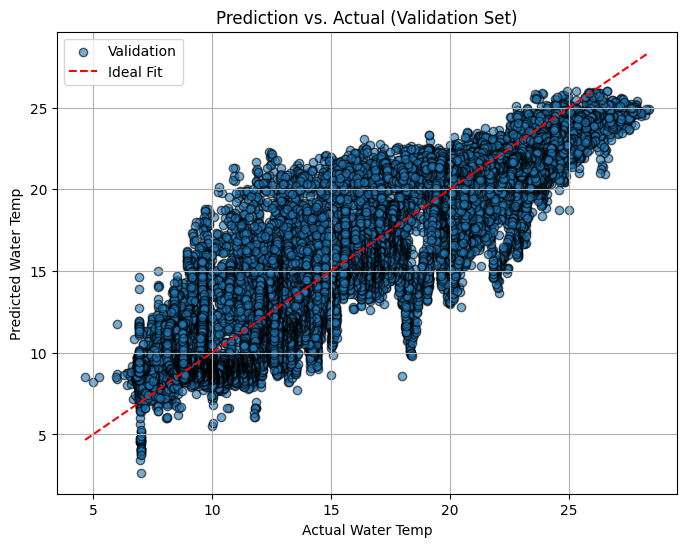

In [ ]:
# Prediction vs. Actual for Validation Data
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred, alpha=0.6, edgecolor="k", label="Validation")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', label="Ideal Fit")
plt.xlabel("Actual Water Temp")
plt.ylabel("Predicted Water Temp")
plt.title("Prediction vs. Actual (Validation Set)")
plt.legend()
plt.grid()
plt.show()

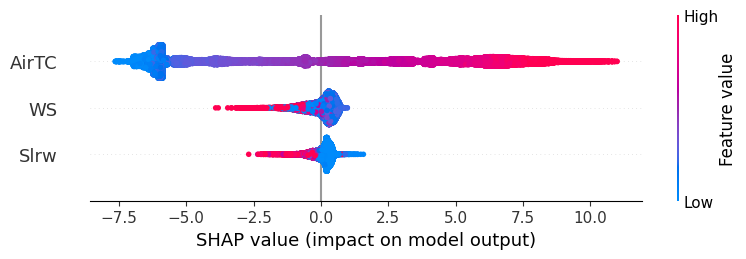

In [ ]:
import shap

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_val)

# Summary plot of feature importance
shap.summary_plot(shap_values, X_val, feature_names=X_train.columns)


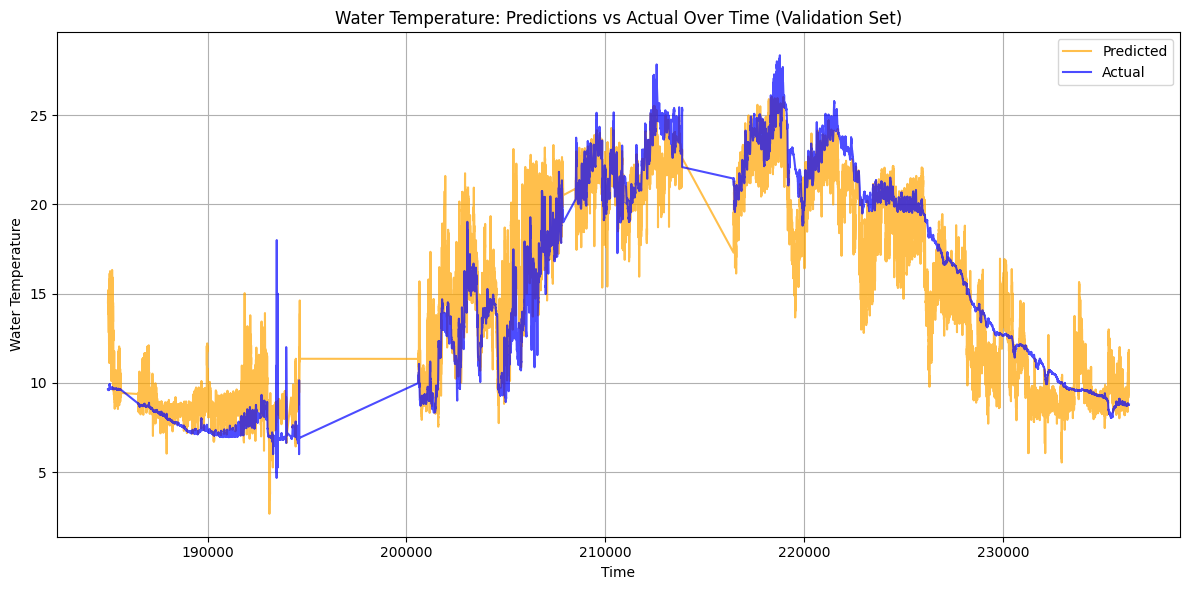

In [ ]:
# Combine the actual and predicted values into a DataFrame for the validation set
val_results = pd.DataFrame({
    "Time": X_val.index,    # Assuming X_val.index contains the time
    "Actual": y_val,
    "Predicted": y_val_pred
})

# Sort by time to ensure a proper time series
val_results.sort_values("Time", inplace=True)

# Plot predictions vs actual values over time
plt.figure(figsize=(12, 6))
plt.plot(val_results["Time"], val_results["Predicted"], label="Predicted", color="orange", alpha=0.7)
plt.plot(val_results["Time"], val_results["Actual"], label="Actual", color="blue", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Water Temperature")
plt.title("Water Temperature: Predictions vs Actual Over Time (Validation Set)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
